# Plots for Section 5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.base import clone

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve, auc
from collections import Counter

import fairlearn
from fairlearn.metrics import *
from fairlearn.reductions import *
import aif360

import copy, random

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [31]:
# representation bias
df_repr_no_inter = pd.read_csv('plot data/fid_repr_no_inter.csv')
df_repr_inter = pd.read_csv('plot data/fid_repr_inter.csv')
df_repr_diff_base = pd.read_csv('plot data/fid_repr_diff_base.csv')

# label noise bias
df_label_noise_no_inter = pd.read_csv('plot data/fid_label_noise_no_inter.csv')
df_label_noise_inter = pd.read_csv('plot data/fid_label_noise_inter.csv')
df_label_noise_diff_base = pd.read_csv('plot data/fid_label_noise_diff_base.csv')

# feature missingness
df_featmissing_no_inter = pd.read_csv('plot data/fid_featmissing_no_inter.csv')
df_featmissing_inter = pd.read_csv('plot data/fid_featmissing_inter.csv')
df_featmissing_base = pd.read_csv('plot data/fid_featmissing_diff_base.csv')

# diff base rates
df_diff_base_rates = pd.read_csv('plot data/fid_diff_base_rates.csv')

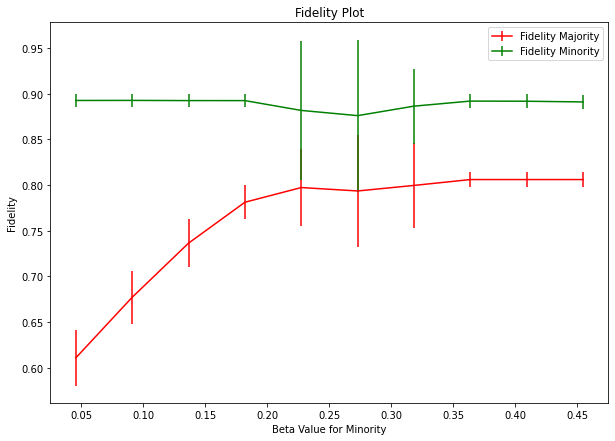

In [32]:
# example usage
df = df_label_noise_diff_base
plt.figure(figsize=(10,7))
plt.errorbar(df.bias_amts, df.mean_fidel_maj, yerr = df.y_err_fidel_maj, label = 'Fidelity Majority', color = "red")
plt.errorbar(df.bias_amts, df.mean_fidel_min, yerr = df.y_err_fidel_min, label = 'Fidelity Minority', color = "green")
plt.xlabel("Beta Value for Minority")
plt.ylabel("Fidelity")
plt.legend()
plt.title("Fidelity Plot")
# plt.savefig('repr_no_inter.jpg')
plt.show()

(0.35, 1.05)

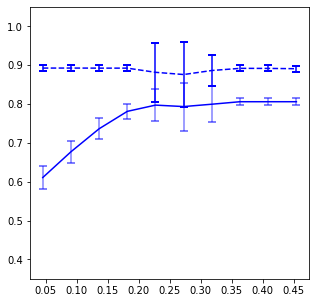

In [34]:
a = 0.5
df_fair = df_label_noise_diff_base
fig, ax = plt.subplots(figsize=(5,5))
markers, caps, bars = ax.errorbar(0.4-df_fair.bias_amts, df_fair.mean_fidel_maj, yerr = df_fair.y_err_fidel_maj, 
                                  label = 'With intervention majority group', color = "blue",
                                  capsize=4, capthick=2)
[bar.set_alpha(a) for bar in bars]
[cap.set_alpha(a) for cap in caps]
markers, caps, bars = ax.errorbar(0.4-df_fair.bias_amts, df_fair.mean_fidel_min, yerr = df_fair.y_err_fidel_min, 
                                  label = 'With intervention minority group', color = "blue",
                                      capsize=4, capthick=2, linestyle='--')
plt.ylim(0.35, 1.05)

In [26]:
0.4-df_fair.bias_amts

0    0.354545
1    0.309091
2    0.263636
3    0.218182
4    0.172727
5    0.127273
6    0.081818
7    0.036364
8   -0.009091
9   -0.054545
Name: bias_amts, dtype: float64